# Macroeconomic Data EDA

This notebook explores GDP growth, inflation, and unemployment data across countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## 1. Load Data

In [2]:
# Load processed data
df = pd.read_csv('../data/processed/macroeconomic.csv')

print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (14364, 6)


,Country Name,Country Code,Year,GDP_Growth,Inflation,Unemployment
0,Aruba,ABW,1971,16.078431,4.032258,6.08
1,Aruba,ABW,1972,16.078431,4.032258,6.08
2,Aruba,ABW,1973,16.078431,4.032258,6.08
3,Aruba,ABW,1974,16.078431,4.032258,6.08
4,Aruba,ABW,1975,16.078431,4.032258,6.08


## 2. Data Overview

In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14364 entries, 0 to 14363
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  14364 non-null  object 
 1   Country Code  14364 non-null  object 
 2   Year          14364 non-null  int64  
 3   GDP_Growth    14148 non-null  float64
 4   Inflation     12960 non-null  float64
 5   Unemployment  13230 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 673.4+ KB


In [4]:
# Summary statistics
df.describe()

,Year,GDP_Growth,Inflation,Unemployment
count,14364.000000,12567.000000,10301.000000,5610.000000
mean,1997.500000,3.451433,20.758465,7.890568
std,15.586327,6.172925,297.933597,5.718558
min,1971.000000,-64.047107,-17.640424,0.039000
25%,1984.000000,1.268232,2.497795,4.108114
50%,1997.500000,3.625449,5.161899,6.600000
75%,2011.000000,5.889827,9.986325,9.938750
max,2024.000000,149.972963,23773.131774,57.000000


In [4]:
# Check for missing values
missing_pct = (df.isnull().sum() / len(df)) * 100
print('Missing values percentage:')
print(missing_pct[missing_pct > 0].sort_values(ascending=False))

Missing values percentage:
Inflation       9.774436
Unemployment    7.894737
GDP_Growth      1.503759
dtype: float64


## 3. Distribution Analysis

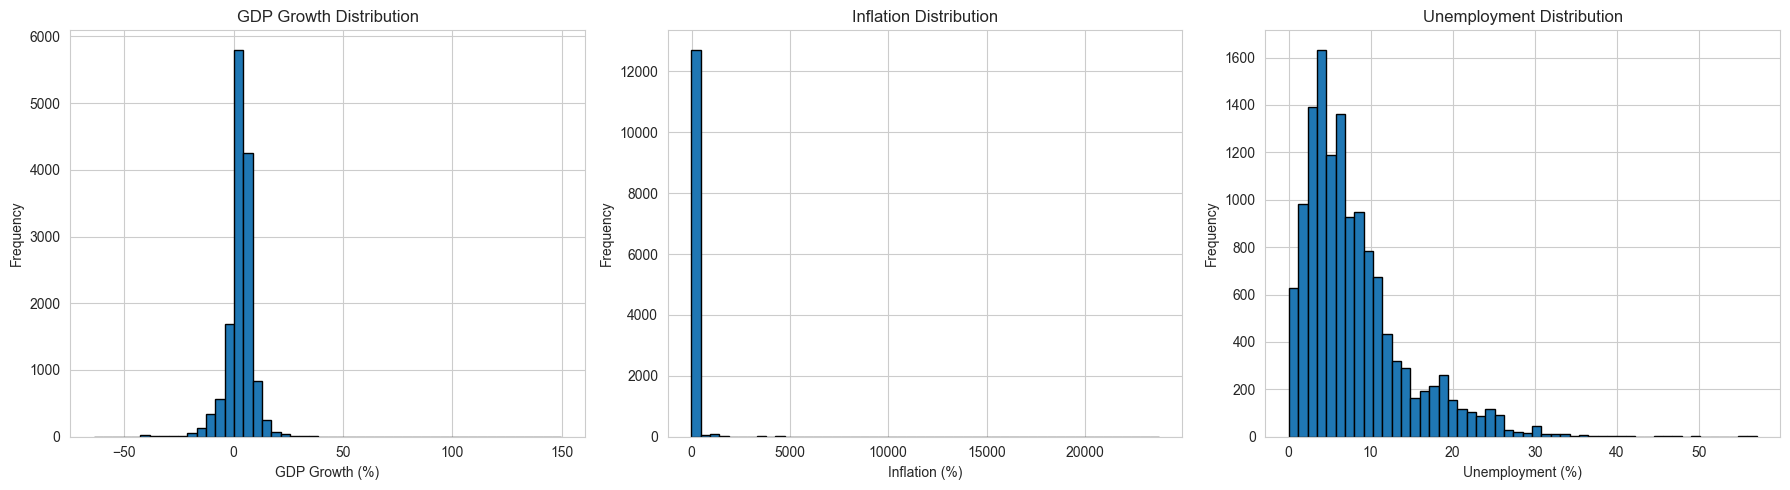

In [5]:
# Distribution of economic indicators
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

df['GDP_Growth'].dropna().hist(bins=50, ax=axes[0], edgecolor='black')
axes[0].set_title('GDP Growth Distribution')
axes[0].set_xlabel('GDP Growth (%)')
axes[0].set_ylabel('Frequency')

df['Inflation'].dropna().hist(bins=50, ax=axes[1], edgecolor='black')
axes[1].set_title('Inflation Distribution')
axes[1].set_xlabel('Inflation (%)')
axes[1].set_ylabel('Frequency')

df['Unemployment'].dropna().hist(bins=50, ax=axes[2], edgecolor='black')
axes[2].set_title('Unemployment Distribution')
axes[2].set_xlabel('Unemployment (%)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Time Series Analysis

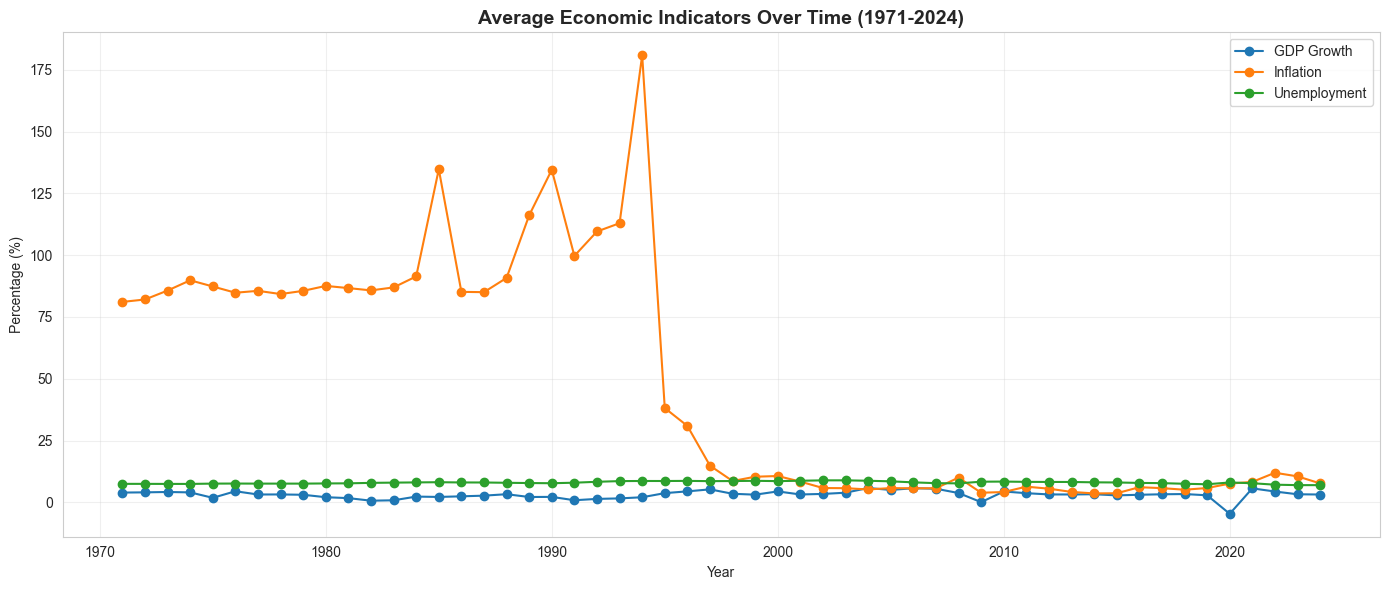

In [6]:
# Average indicators over time
avg_by_year = df.groupby('Year')[['GDP_Growth', 'Inflation', 'Unemployment']].mean()

fig, ax = plt.subplots(figsize=(14, 6))
avg_by_year.plot(ax=ax, marker='o')
ax.set_title('Average Economic Indicators Over Time (1971-2024)', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)')
ax.legend(['GDP Growth', 'Inflation', 'Unemployment'])
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

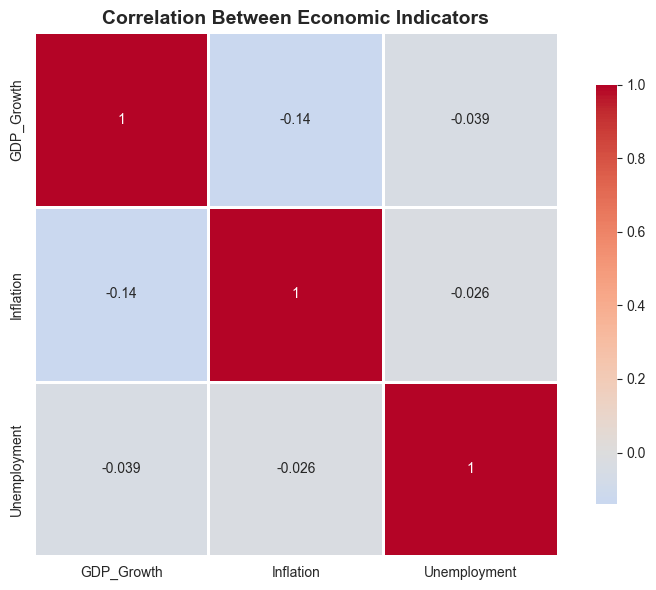

In [7]:
# Correlation matrix
correlation = df[['GDP_Growth', 'Inflation', 'Unemployment']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Between Economic Indicators', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Country-wise Analysis

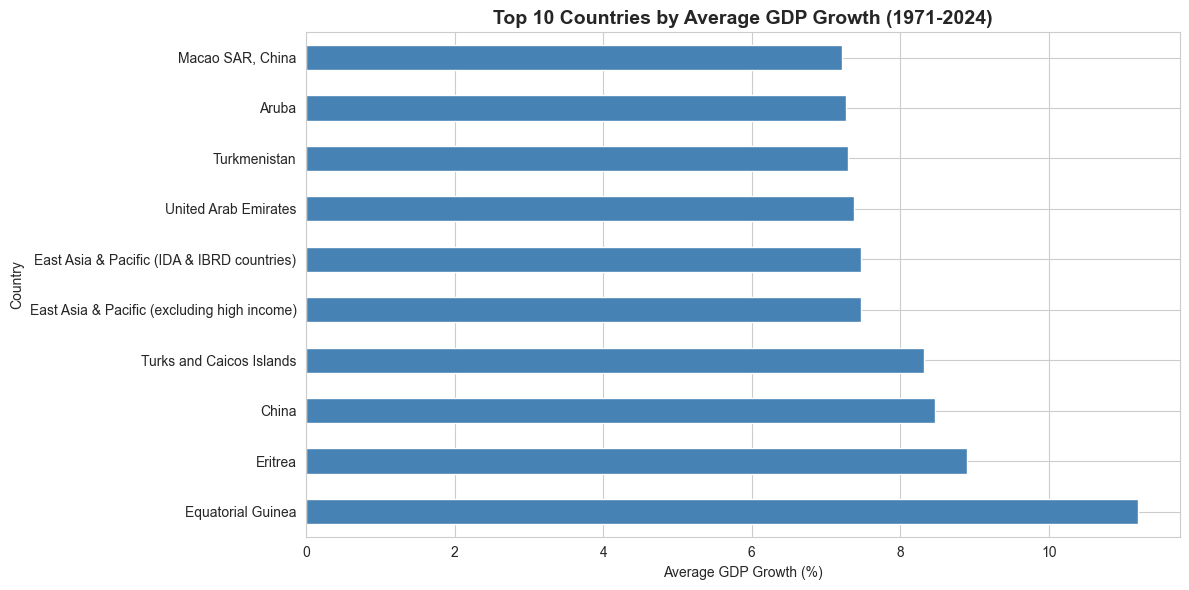

In [8]:
# Top 10 countries by average GDP growth
top_gdp = df.groupby('Country Name')['GDP_Growth'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_gdp.plot(kind='barh', color='steelblue')
plt.title('Top 10 Countries by Average GDP Growth (1971-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Average GDP Growth (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## 7. Interactive Visualization

In [9]:
# Interactive time series for selected countries
countries_to_plot = df['Country Name'].value_counts().head(5).index.tolist()
df_selected = df[df['Country Name'].isin(countries_to_plot)]

fig = px.line(df_selected, x='Year', y='GDP_Growth', color='Country Name',
              title='GDP Growth Over Time - Top 5 Countries',
              labels={'GDP_Growth': 'GDP Growth (%)'})
fig.update_layout(hovermode='x unified')
fig.show()

## 8. Insights Summary

In [10]:
print('=== KEY INSIGHTS ===\n')
print(f'Total countries: {df["Country Name"].nunique()}')
print(f'Year range: {df["Year"].min()} - {df["Year"].max()}')
print(f'\nAverage GDP Growth: {df["GDP_Growth"].mean():.2f}%')
print(f'Average Inflation: {df["Inflation"].mean():.2f}%')
print(f'Average Unemployment: {df["Unemployment"].mean():.2f}%')
print(f'\nData completeness:')
print(f'GDP Growth: {(1 - df["GDP_Growth"].isnull().mean()) * 100:.1f}%')
print(f'Inflation: {(1 - df["Inflation"].isnull().mean()) * 100:.1f}%')
print(f'Unemployment: {(1 - df["Unemployment"].isnull().mean()) * 100:.1f}%')

=== KEY INSIGHTS ===

Total countries: 266
Year range: 1971 - 2024

Average GDP Growth: 3.06%
Average Inflation: 48.50%
Average Unemployment: 7.98%

Data completeness:
GDP Growth: 98.5%
Inflation: 90.2%
Unemployment: 92.1%
